# Neural networks - straightforward guide

In [ ]:
import json
import pickle

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler, MultiLabelBinarizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc, log_loss, precision_recall_curve
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras

In [2]:
%matplotlib inline

plt.style.use('bmh')
plt.rcParams['figure.figsize'] = (16, 9)
plt.rcParams['figure.facecolor'] = 'silver'

# Kaggle
https://www.kaggle.com/uciml/pima-indians-diabetes-database

In [3]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/'

df_red = pd.read_csv(url + 'winequality-red.csv', sep=';')
df_white = pd.read_csv(url + 'winequality-white.csv', sep=';')
df = pd.concat([
    df_red.assign(color_red=True),
    df_white.assign(color_red=False),
]).reset_index(drop=True)

display(df)
display(df['quality'].value_counts().sort_index())
X = df.drop(columns='quality').astype(float).values
y = df['quality'].values >= 7

descr = requests.get(url + 'winequality.names').text
print(descr)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color_red
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,True
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,True
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,True
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,True
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,False
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,False
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,False
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,False


3      30
4     216
5    2138
6    2836
7    1079
8     193
9       5
Name: quality, dtype: int64

Citation Request:
  This dataset is public available for research. The details are described in [Cortez et al., 2009]. 
  Please include this citation if you plan to use this database:

  P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
  Modeling wine preferences by data mining from physicochemical properties.
  In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.

  Available at: [@Elsevier] http://dx.doi.org/10.1016/j.dss.2009.05.016
                [Pre-press (pdf)] http://www3.dsi.uminho.pt/pcortez/winequality09.pdf
                [bib] http://www3.dsi.uminho.pt/pcortez/dss09.bib

1. Title: Wine Quality 

2. Sources
   Created by: Paulo Cortez (Univ. Minho), Antonio Cerdeira, Fernando Almeida, Telmo Matos and Jose Reis (CVRVV) @ 2009
   
3. Past Usage:

  P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
  Modeling wine preferences by data mining from physicochemical properties.
  In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 016

# Recap

In [4]:
rf = RandomForestClassifier(n_estimators=20, min_samples_leaf=3, max_features=0.5, n_jobs=-1, bootstrap=True)
rf.fit(X, y)

accuracy_score(y, rf.predict(X))

0.9741419116515315

In [5]:
from sklearn.metrics import classification_report

print(classification_report(y, rf.predict(X), target_names=['bad', 'good']))

              precision    recall  f1-score   support

         bad       0.97      1.00      0.98      5220
        good       0.99      0.88      0.93      1277

    accuracy                           0.97      6497
   macro avg       0.98      0.94      0.96      6497
weighted avg       0.97      0.97      0.97      6497



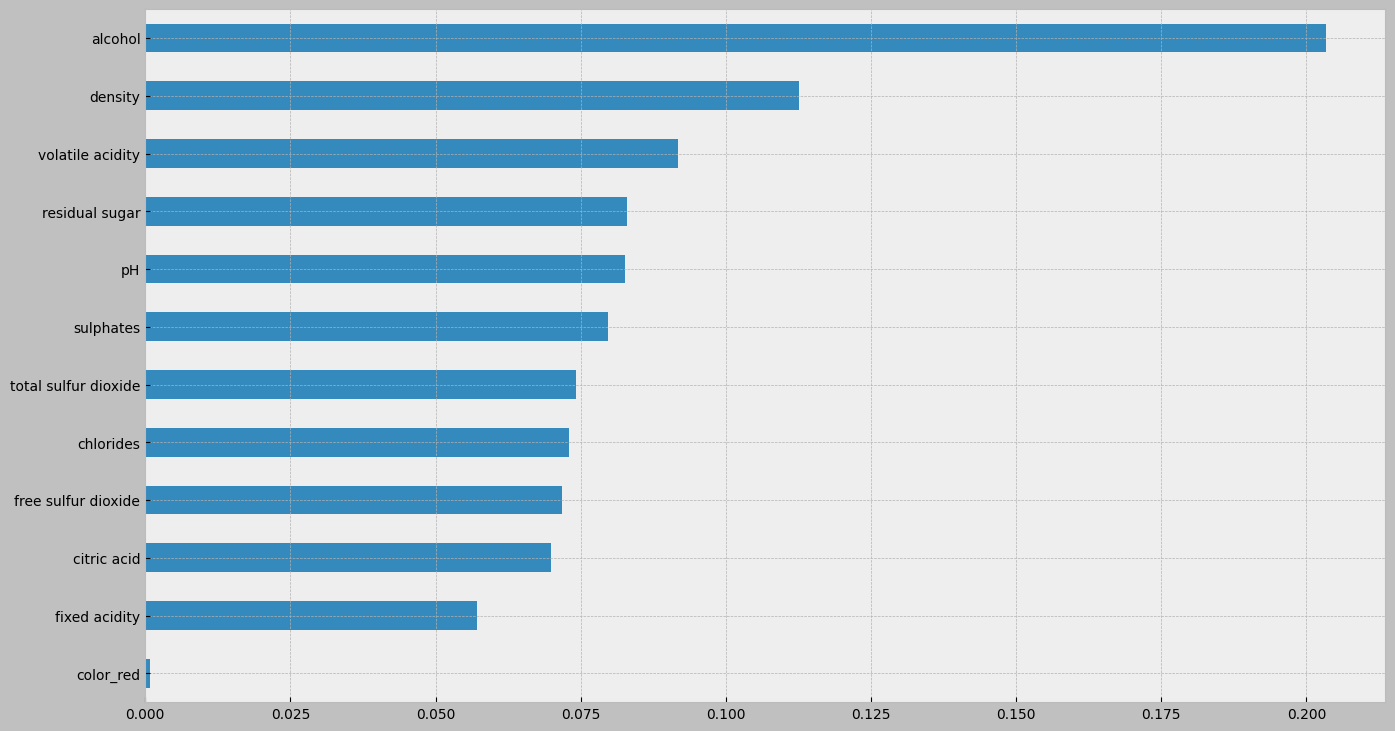

In [6]:
pd.Series(rf.feature_importances_, index=df.drop(columns='quality').columns).sort_values().plot.barh();

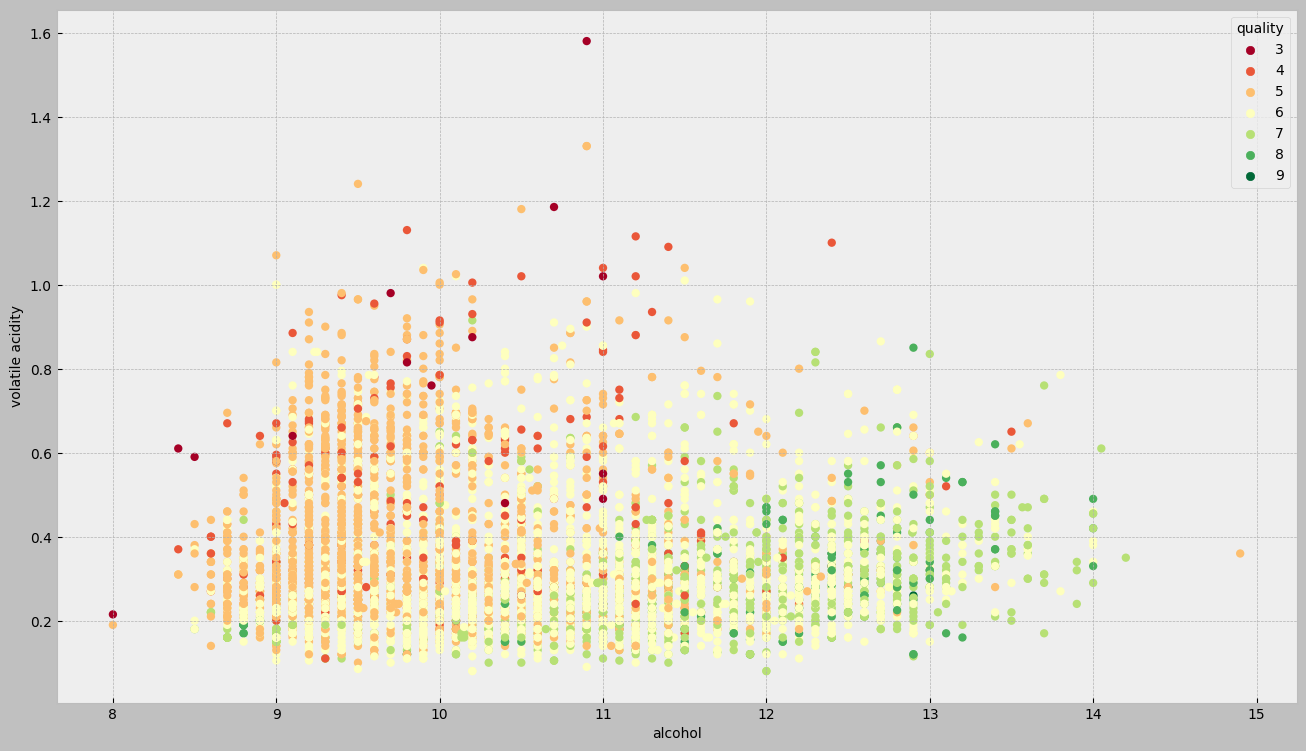

In [7]:
sns.scatterplot(x='alcohol', y='volatile acidity', hue='quality', data=df, palette='RdYlGn', ec=None);

# Train a neural network
https://keras.io/  
https://www.tensorflow.org/guide/keras

In [8]:
# Model prediction expressed as probabilities
rf.predict_proba(X[:10])

array([[1.        , 0.        ],
       [1.        , 0.        ],
       [0.97857143, 0.02142857],
       [0.975     , 0.025     ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.59200397, 0.40799603],
       [0.77321429, 0.22678571],
       [0.975     , 0.025     ]])

[Log loss visually explained](https://towardsdatascience.com/understanding-binary-cross-entropy-log-loss-a-visual-explanation-a3ac6025181a)

TL;DR:

$\huge H(y, pred) = -\frac{\sum_{i=1}^{N} y_ilog(pred_i) \ + \ (1 - y_i)log(1-pred_i)}{N}$

Because $y$ is always 0 or 1, it "toggles" the terms of the summation on/off and it could be rewritten as:
$\large -\frac{1}{N}\sum_{i=1}^{N} log(1 - err_i)$

In [9]:
log_loss(y, rf.predict_proba(X)[:, 1])

0.13877378312394206

In [10]:
neural_net = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=X.shape[1:]),
    keras.layers.Dense(16, activation='relu'),
    
    # outputs in the range 0-1
    keras.layers.Dense(1, activation='sigmoid')
])

neural_net.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
neural_net.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                832       
                                                                 
 dense_1 (Dense)             (None, 16)                1040      
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 1,889
Trainable params: 1,889
Non-trainable params: 0
_________________________________________________________________


In [11]:
callbacks = []

# Stops training if model's loss doesn't improve for over 3 epochs
callbacks.append(keras.callbacks.EarlyStopping(monitor='loss', min_delta=0.1, mode='auto', patience=5, 
                                               restore_best_weights=True))

# Writes to disk the model with the best accuracy
callbacks.append(keras.callbacks.ModelCheckpoint('neural_net.h5', monitor='accuracy', save_weights_only=False, 
                                                 save_best_only=True, mode='auto'))

history = neural_net.fit(x=X, y=y, validation_split=.2, batch_size=32, epochs=100, callbacks=callbacks)

Epoch 1/100
163/163 [==============================] - 1s 3ms/step - loss: 0.6358 - accuracy: 0.7708 - val_loss: 0.4650 - val_accuracy: 0.8100
Epoch 2/100
163/163 [==============================] - 0s 2ms/step - loss: 0.4706 - accuracy: 0.8032 - val_loss: 0.5444 - val_accuracy: 0.7538
Epoch 3/100
163/163 [==============================] - 0s 2ms/step - loss: 0.4580 - accuracy: 0.8068 - val_loss: 0.4517 - val_accuracy: 0.8108
Epoch 4/100
163/163 [==============================] - 0s 2ms/step - loss: 0.4436 - accuracy: 0.8080 - val_loss: 0.5339 - val_accuracy: 0.7462
Epoch 5/100
163/163 [==============================] - 0s 2ms/step - loss: 0.4375 - accuracy: 0.8058 - val_loss: 0.4543 - val_accuracy: 0.8085
Epoch 6/100
163/163 [==============================] - 0s 2ms/step - loss: 0.4337 - accuracy: 0.8132 - val_loss: 0.4581 - val_accuracy: 0.8092
Epoch 7/100
163/163 [==============================] - 0s 2ms/step - loss: 0.4368 - accuracy: 0.8062 - val_loss: 0.4603 - val_accuracy: 0.7969

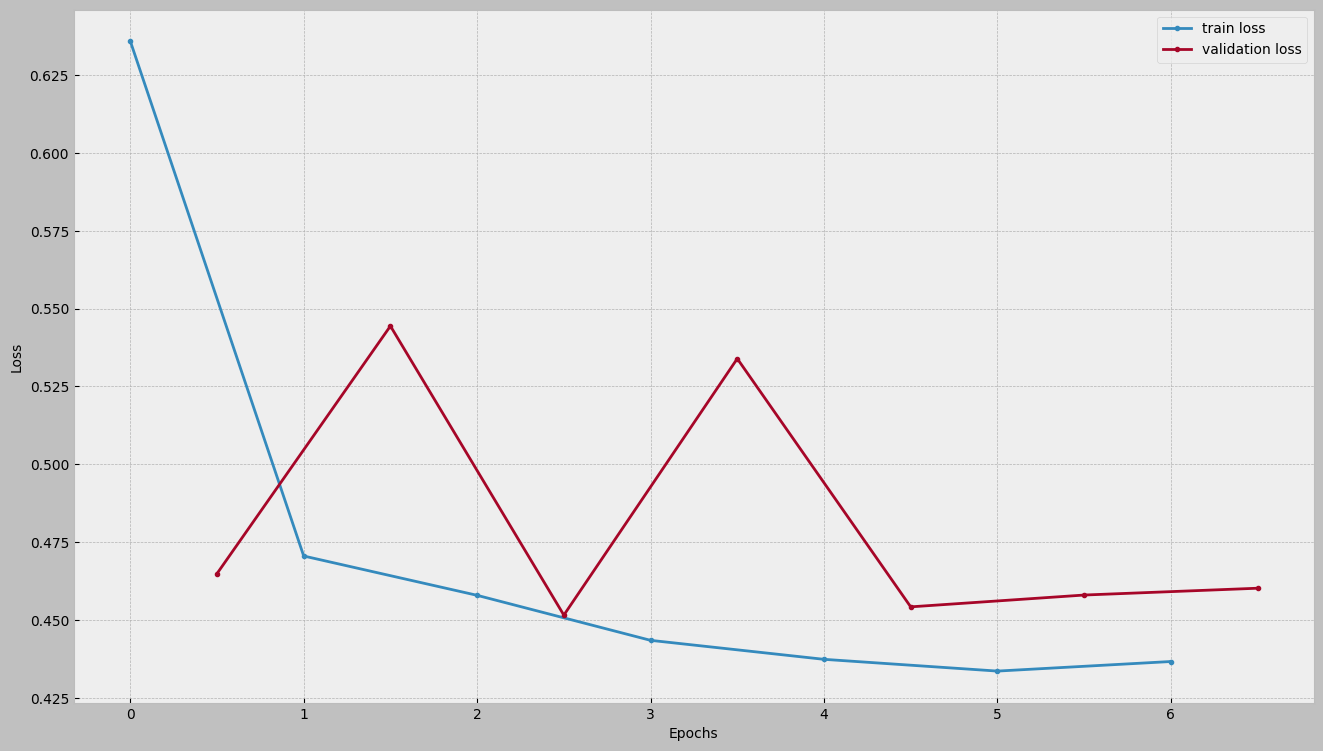

In [12]:
epochs = np.array(history.epoch)

plt.plot(epochs,      history.history['loss'],     label='train loss',      marker='.')
plt.plot(epochs + .5, history.history['val_loss'], label='validation loss', marker='.')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend();

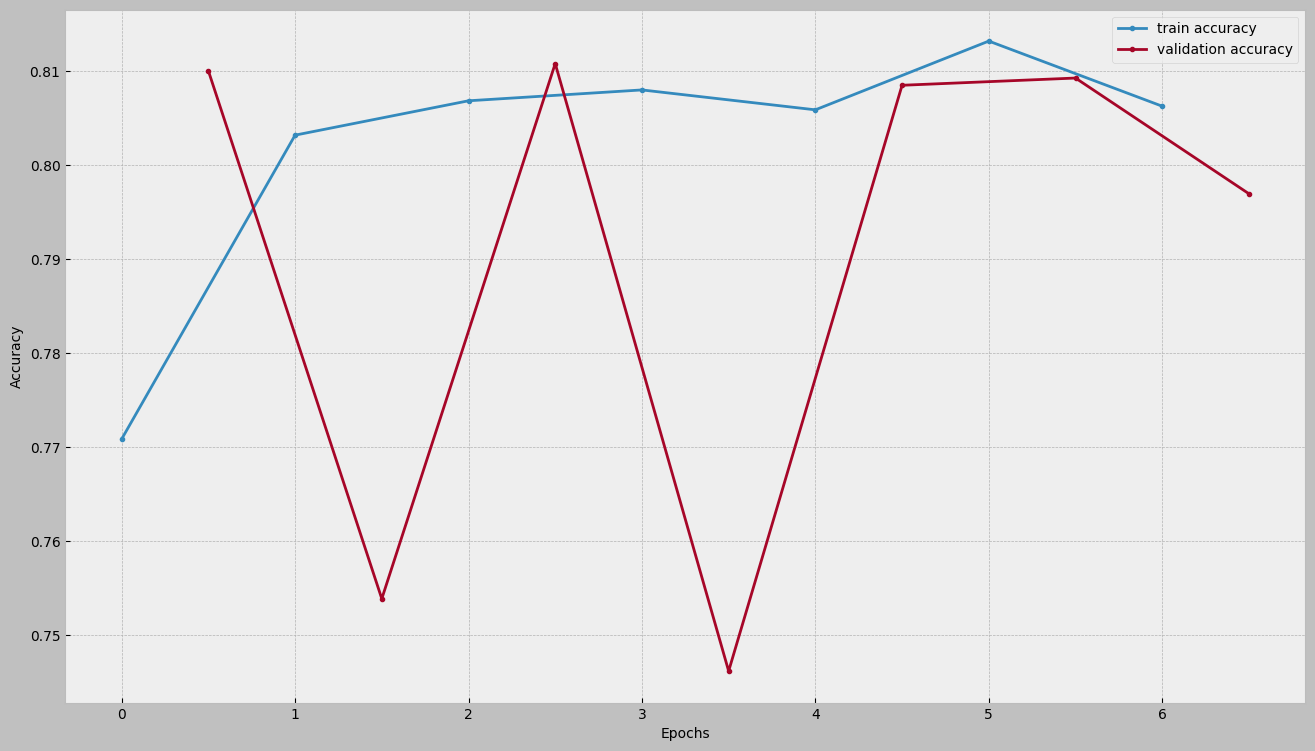

In [13]:
plt.plot(epochs,      history.history['accuracy'],     label='train accuracy',      marker='.')
plt.plot(epochs + .5, history.history['val_accuracy'], label='validation accuracy', marker='.')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend();

# Single-layer perceptron

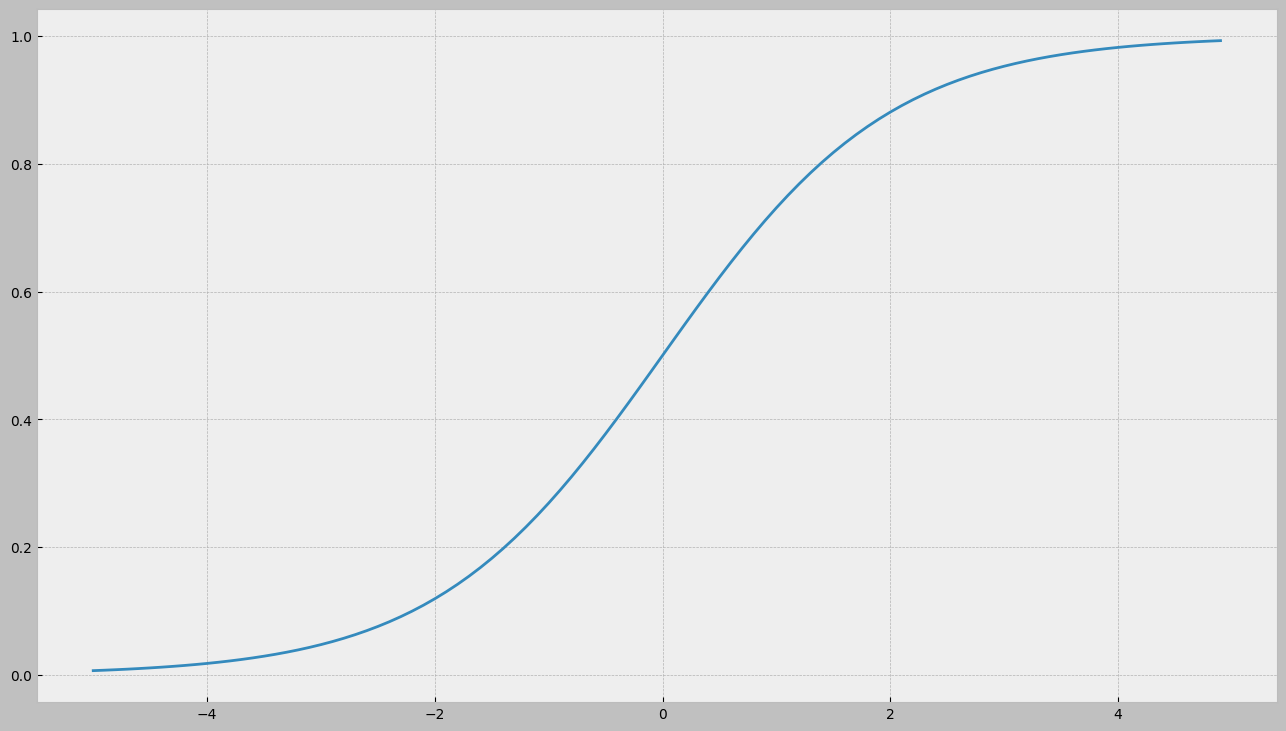

In [14]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.arange(-5, 5, 0.1)

plt.plot(x, sigmoid(x))
plt.grid(True);

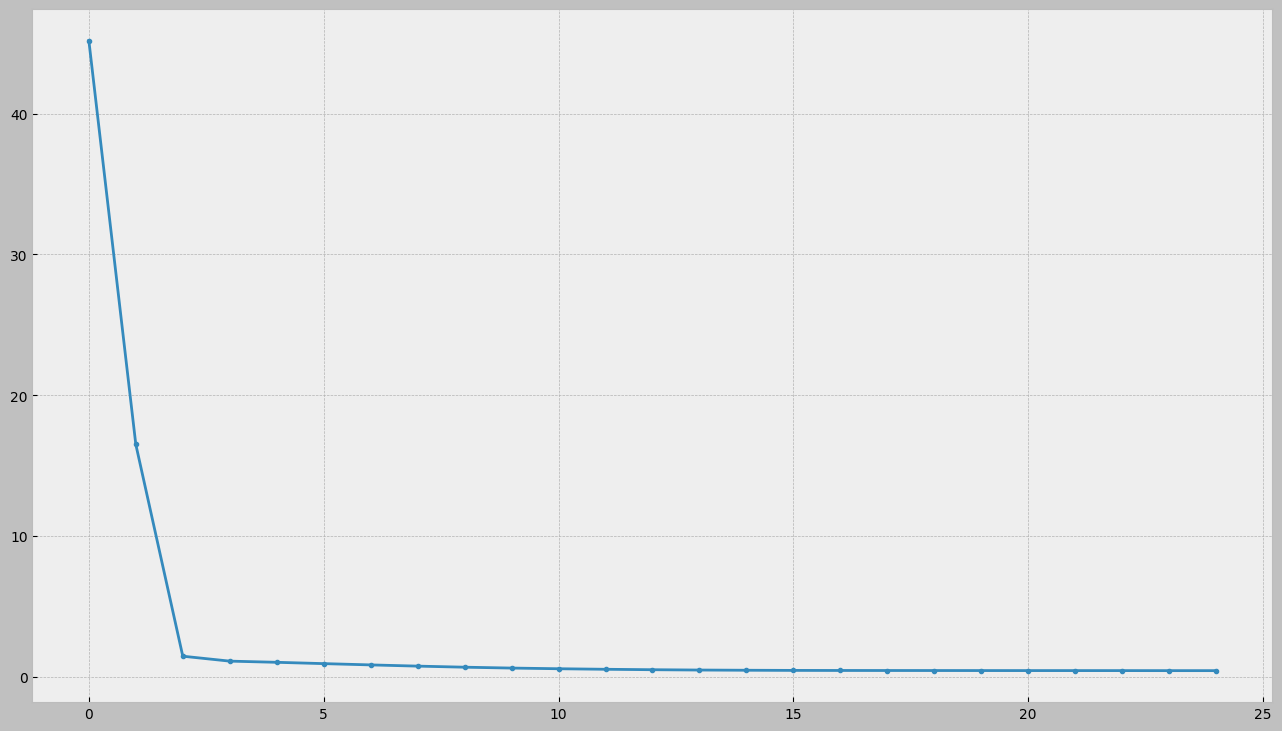

In [15]:
neural_net = keras.Sequential([
    keras.layers.InputLayer(input_shape=(X.shape[1],)),
    keras.layers.Dense(1, activation='sigmoid')
])

neural_net.compile(optimizer=keras.optimizers.Adam(), loss='binary_crossentropy', metrics=['accuracy'])

history = neural_net.fit(x=X, y=y, batch_size=32, epochs=25, verbose=False)

plt.plot(history.history['loss'], marker='.');

In [16]:
weights, bias = neural_net.layers[-1].get_weights()
print('Shapes:', weights.shape, bias.shape)
print(weights)
print(bias)

Shapes: (12, 1) (1,)
[[-0.3263217 ]
 [-0.68147427]
 [ 0.55386424]
 [-0.00227888]
 [-1.0057374 ]
 [ 0.0167712 ]
 [-0.01240453]
 [-0.40554836]
 [ 0.03571371]
 [ 0.3550028 ]
 [ 0.27543187]
 [-0.85214925]]
[-0.53303134]


In [17]:
y_hat = sigmoid(np.dot(X, weights) + bias)

print(log_loss(y, y_hat))
print(accuracy_score(y, y_hat > 0.5))

0.44680219941395516
0.8063721717715869


In [18]:
history.history['loss'][-1], history.history['accuracy'][-1]

(0.44613784551620483, 0.8057565093040466)

# Gradient descent

# By hand

In [19]:
def f(x):
    return x ** 2

def df(x):
    return x * 2

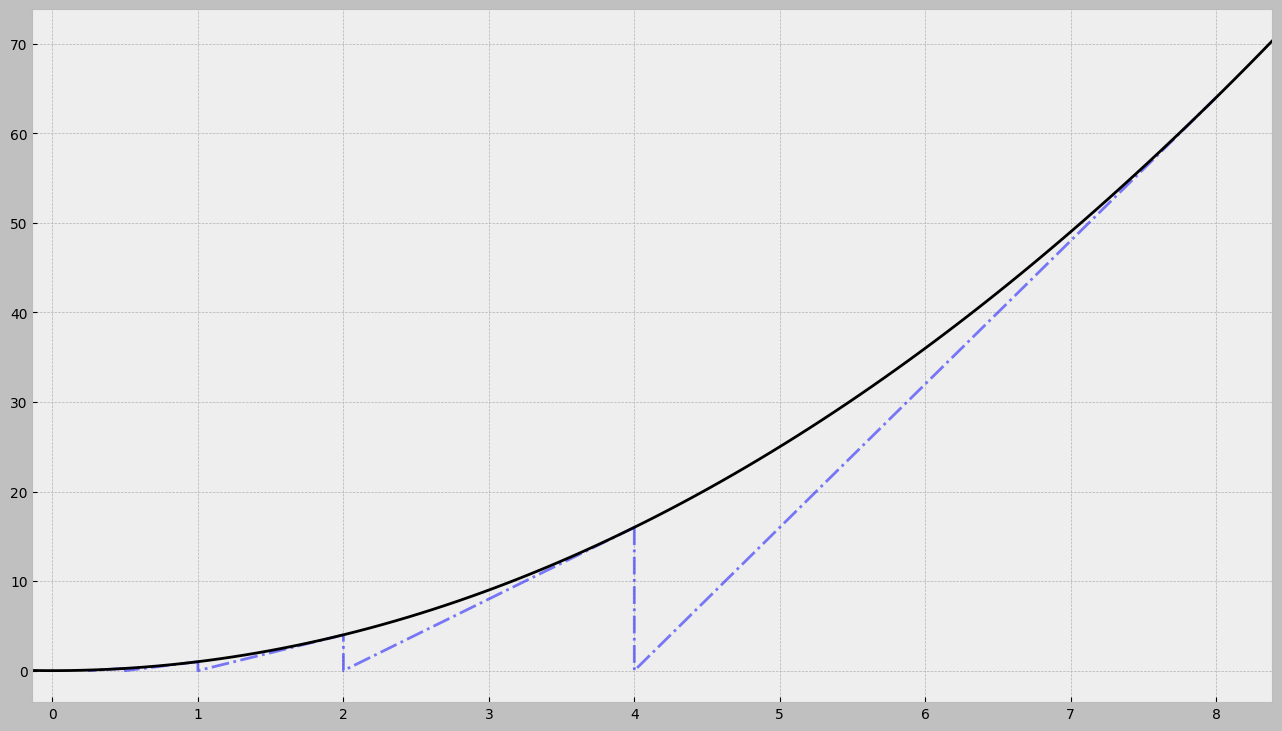

In [20]:
x0 = 8
lr = .25
steps = 5

projections = True
for i in range(steps):
    x1 = x0 - lr * df(x0)
    p1 = f(x0) - lr * df(x0) ** 2
    y1 = f(x1)
    
    # plt.plot([x0, x1], [f(x0), y1], marker='.', c='b')
    if projections:
        plt.plot([x0, x1, x1], [f(x0), p1, y1], ls='-.', alpha=.5, c='b')
    
    x0 = x1
    
xmin, xmax = plt.xlim()
x = np.linspace(*plt.xlim(), 100)
plt.autoscale(False, axis='x')
plt.plot(x, f(x), color='k', label='f(x)');

Complicated functions, like neural nets, can be broken down into elementary functions that we know the derivatives to.

A layer like $\sigma(w \cdot x + b)$ would become $\sigma(\ add(\ mat\_mul(w, x), b))$

From there we apply the chain rule: $f(g(x))' = f'(g(x)) * g'(x)$

Training a neural network is performed through back-propagation, which involves applying the chain rule repeatedly until adjustments are made to all its weights. Fortunately libraries like Tensorflow and PyTorch handle all this busywork behind the scenes.

[Visualisations of neural networks training](https://playground.tensorflow.org/#activation=linear)

## Auto-differentiation example

In [21]:
class Variable:
    var_cnt = 0

    def __init__(
            self,
            value,
            name=None
    ):
        self.value = value
        self.grad = 0
        self.parents = set()
        self._backward = lambda: None

        self.name = name if name != None else f'var_{Variable.var_cnt}'

    def __repr__(self):
        return f'<Variable {self.name} value: {self.value} grad: {self.grad}>'
    
    def __add__(self,other):
        other = other if isinstance(other,Variable) else Variable(other)

        out = Variable(self.value + other.value,name=f'add_{self.name}_{other.name}')

        def _backward():
            self.grad += out.grad
            other.grad += out.grad

        out.parents = {self,other}
        out._backward = _backward

        return out
    
    def __radd__(self,other):
        return self + other
    
    def __mul__(self,other):
        other = other if isinstance(other,Variable) else Variable(other)

        out = Variable(self.value * other.value,name=f'mul_{self.name}_{other.name}')

        def _backward():
            self.grad += out.grad * other.value
            other.grad += out.grad * self.value

        out.parents = {self,other}
        out._backward = _backward

        return out
    
    def __rmul__(self,other):
        return self * other
    
    def backward(self):
        self.grad = 1

        topo_order = []
        visited = set()

        def topo(node):
            if not node in visited:
                visited.add(node)
                for parent in node.parents:
                    topo(parent)
                topo_order.append(node)
        
        topo(self)
        for node in topo_order[::-1]:
            node._backward()

In [22]:
x = Variable(-8)

z = x*x + 5*x + 6
z.backward()

print(x.grad)

-11


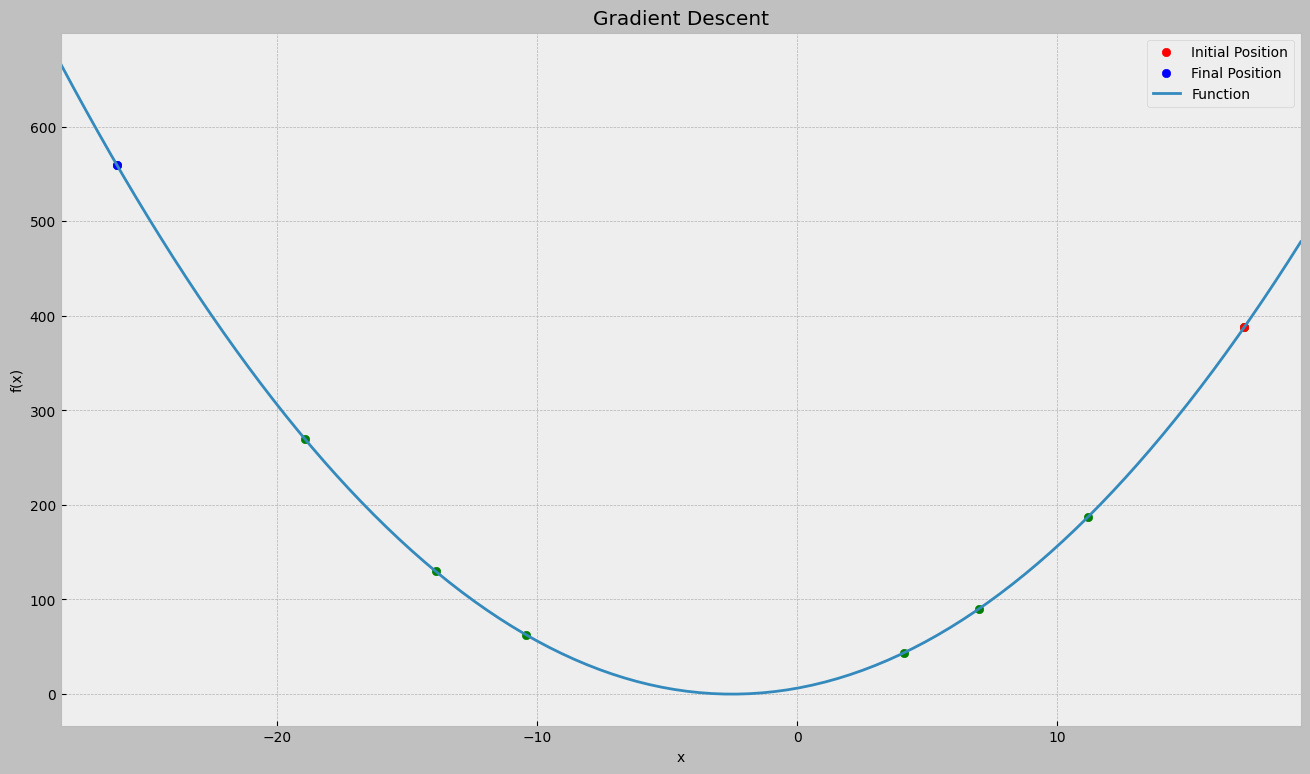

In [23]:
# Our mountain function
def f(x):
    return x*x + 5*x + 6

learning_rate = 1.1
num_steps = 8
x = Variable(-8)

x0 = x.value
for step in range(num_steps):
    x0 = x.value
    y_x = f(x)
    
    y_x.backward()
    x.value -= learning_rate * x.grad
    x.grad = 0
    
    plt.scatter(x.value, f(x).value, color='green')

plt.scatter(x0, f(x0), color='red', label='Initial Position')
plt.scatter(x.value, f(x).value, color='blue', label='Final Position')

xmin, xmax = plt.xlim()
xs = np.linspace(*plt.xlim(), 100)
plt.autoscale(False, axis='x')
plt.plot(xs, f(xs), label='Function')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Gradient Descent')
plt.legend();

# Activation functions - extra decision power

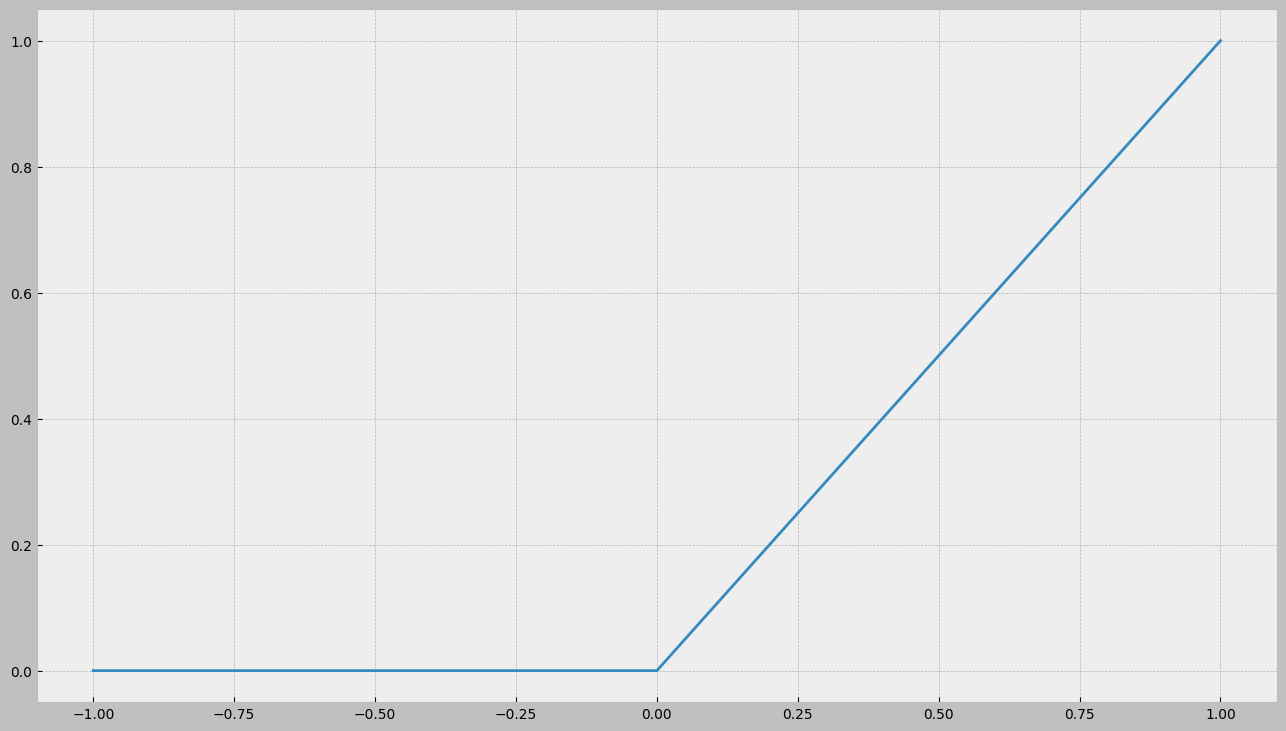

In [24]:
def relu(x):
    return x * (x > 0)

x = np.linspace(-1, 1, 101)
plt.plot(x, relu(x))
plt.grid(True)

In [25]:
neural_net = keras.Sequential([
    keras.layers.InputLayer(input_shape=(X.shape[1],)),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

neural_net.compile(optimizer=keras.optimizers.Adam(), loss='binary_crossentropy', metrics=['acc'])
history = neural_net.fit(x=X, y=y, validation_split=.25, batch_size=32, epochs=100, verbose=False)

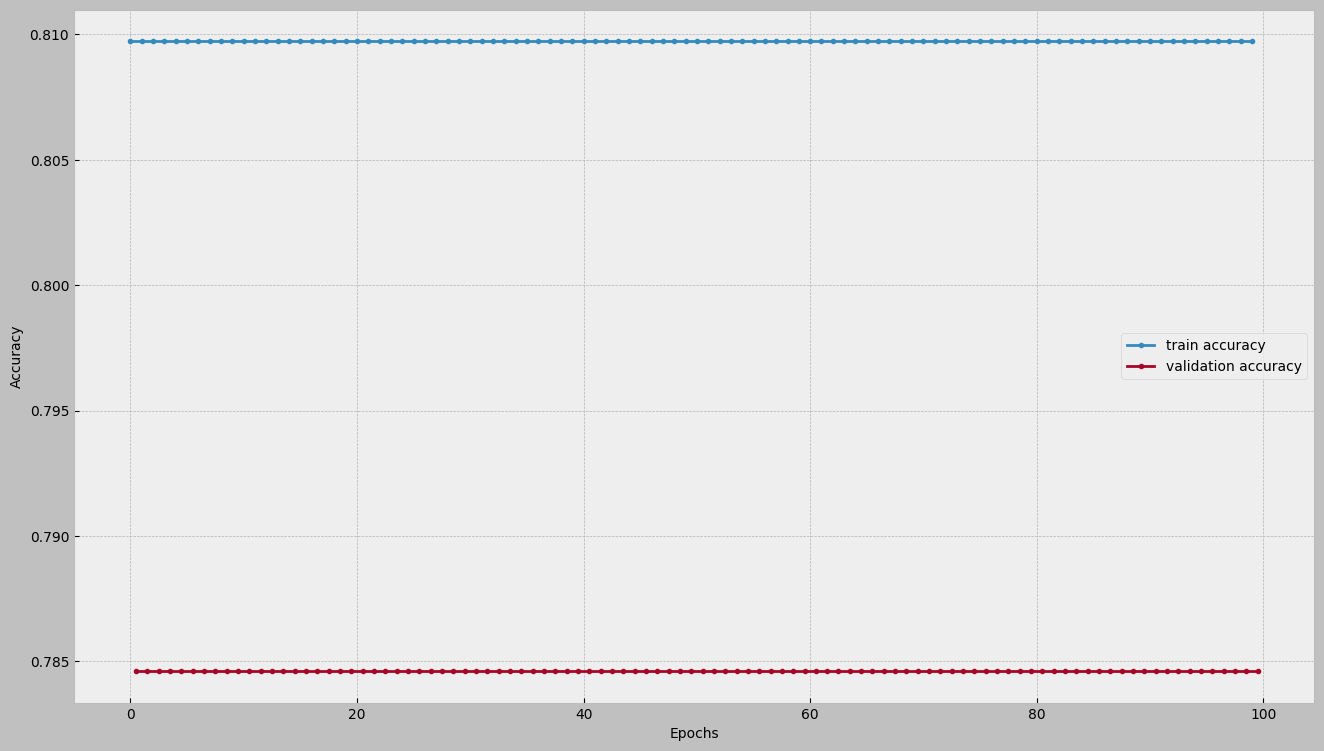

In [26]:
plt.plot(history.history['acc'], label='train accuracy', marker='.')
plt.plot(np.array(history.epoch) + .5, 
         history.history['val_acc'], label='validation accuracy', marker='.')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend();

# Scaling - using the same units

In [27]:
scaler = StandardScaler()

scaler.fit(X)
X_s = scaler.transform(X)

In [28]:
neural_net = keras.Sequential([
    keras.layers.InputLayer(input_shape=(X.shape[1],)),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

neural_net.compile(optimizer=keras.optimizers.Adam(), loss='binary_crossentropy', metrics=['acc'])
history = neural_net.fit(x=X_s, y=y, validation_split=.25, batch_size=32, epochs=100, verbose=False)

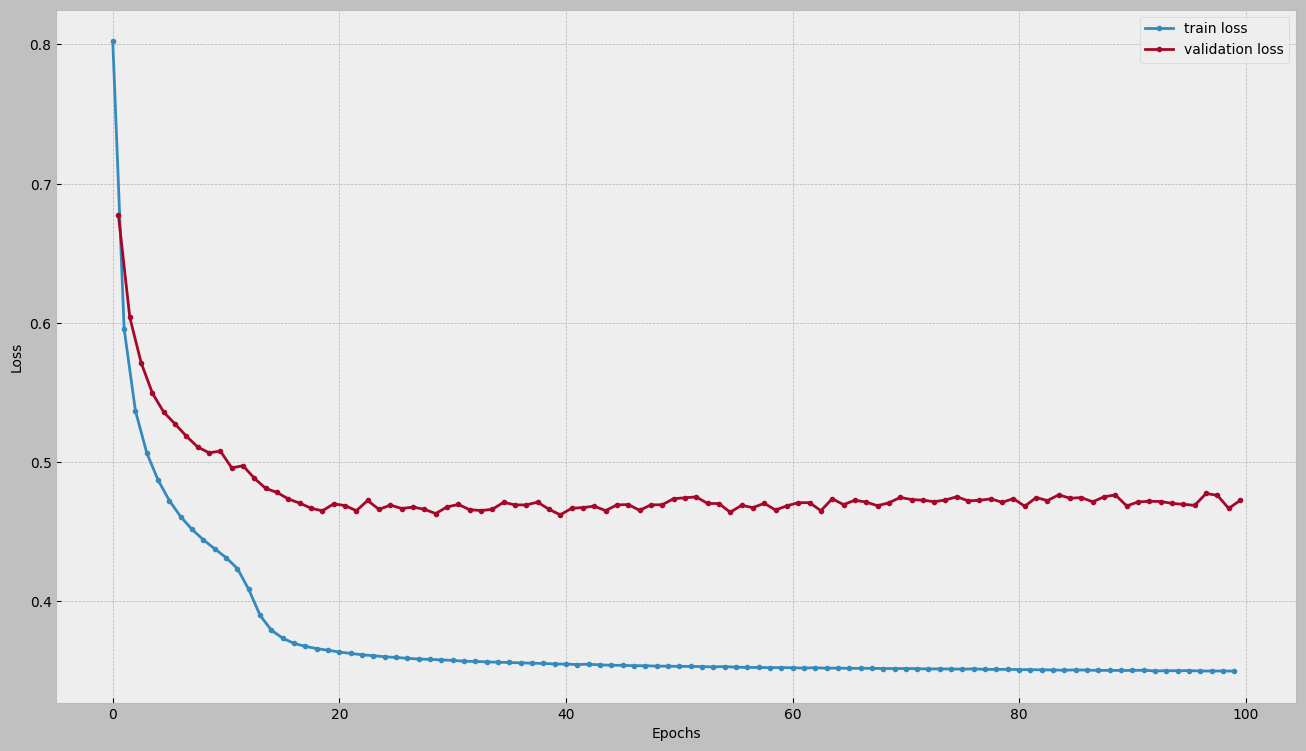

In [29]:
plt.plot(history.history['loss'], label='train loss', marker='.')
plt.plot(np.array(history.epoch) + .5, 
         history.history['val_loss'], label='validation loss', marker='.')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend();

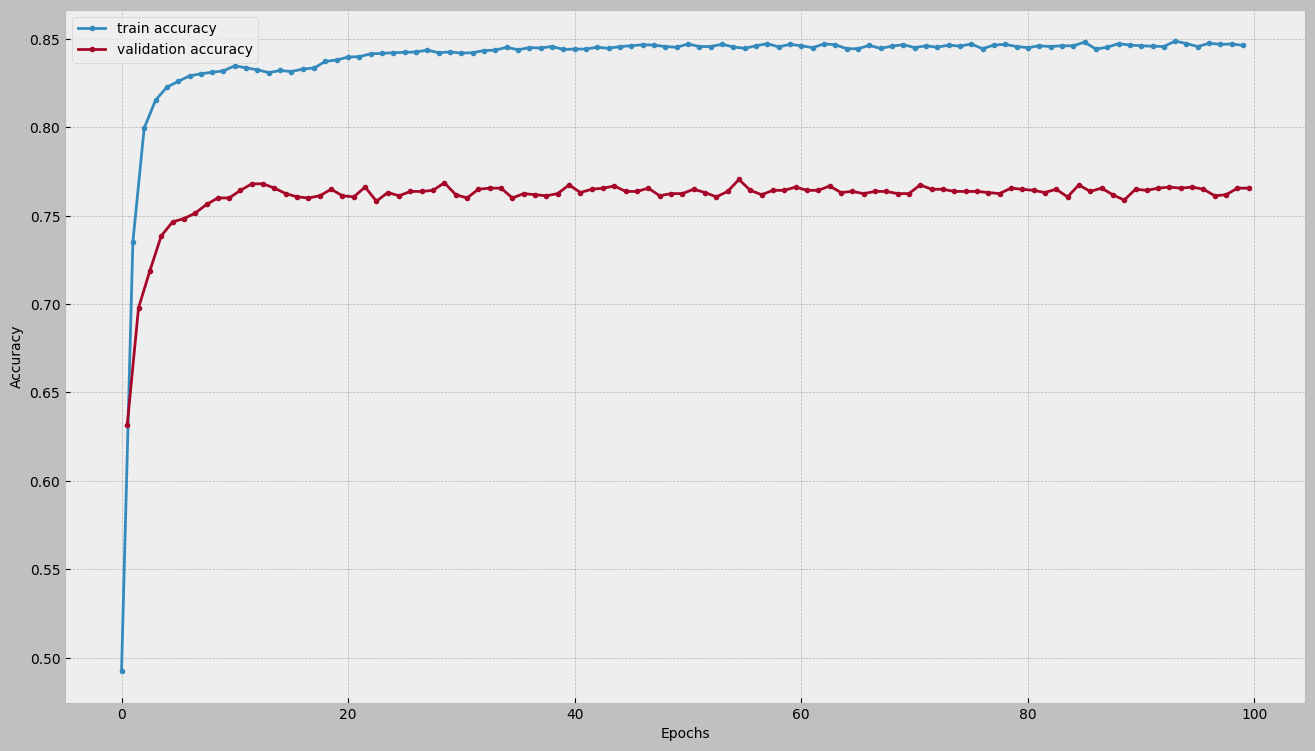

In [30]:
plt.plot(history.history['acc'], label='train accuracy', marker='.')
plt.plot(np.array(history.epoch) + .5, 
         history.history['val_acc'], label='validation accuracy', marker='.')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend();

# Train / Validation / Test
- Good practice https://dashee87.github.io/data%20science/deep%20learning/python/another-keras-tutorial-for-neural-network-beginners/

In [50]:
from sklearn.model_selection import train_test_split

# Store the scaler in a file; You'll need it to make predictions on new inputs
scaler = StandardScaler()
X_ = scaler.fit_transform(X)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

X_trn, X_tst, y_trn, y_tst = train_test_split(X_, y, test_size=0.2, stratify=y)
X_trn, X_val, y_trn, y_val = train_test_split(X_trn, y_trn, test_size=0.25, stratify=y_trn)

len(y_trn), len(y_val), len(y_tst)

(3897, 1300, 1300)

In [51]:
neural_net = keras.Sequential([
    keras.layers.InputLayer(input_shape=(X.shape[1],)),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [52]:
callbacks = []
callbacks.append(keras.callbacks.EarlyStopping(monitor='val_loss', patience=10))
callbacks.append(keras.callbacks.ModelCheckpoint('neural_net.h5', monitor='val_acc',
                                                 save_weights_only=False, save_best_only=True))

neural_net.compile(optimizer=keras.optimizers.Adam(), loss='binary_crossentropy', metrics=['acc'])
neural_net.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 4)                 52        
                                                                 
 dense_15 (Dense)            (None, 4)                 20        
                                                                 
 dense_16 (Dense)            (None, 1)                 5         
                                                                 
Total params: 77
Trainable params: 77
Non-trainable params: 0
_________________________________________________________________


In [53]:
history = neural_net.fit(X_trn, y_trn, validation_data=(X_val, y_val), batch_size=32, epochs=100,
                         shuffle=False, callbacks=callbacks)

neural_net = keras.models.load_model('neural_net.h5')

Epoch 1/100
122/122 [==============================] - 1s 3ms/step - loss: 0.7249 - acc: 0.5727 - val_loss: 0.6644 - val_acc: 0.7415
Epoch 2/100
122/122 [==============================] - 0s 2ms/step - loss: 0.6321 - acc: 0.7844 - val_loss: 0.6011 - val_acc: 0.7992
Epoch 3/100
122/122 [==============================] - 0s 2ms/step - loss: 0.5695 - acc: 0.8016 - val_loss: 0.5348 - val_acc: 0.8046
Epoch 4/100
122/122 [==============================] - 0s 2ms/step - loss: 0.5034 - acc: 0.8047 - val_loss: 0.4849 - val_acc: 0.8069
Epoch 5/100
122/122 [==============================] - 0s 2ms/step - loss: 0.4637 - acc: 0.8124 - val_loss: 0.4574 - val_acc: 0.8092
Epoch 6/100
122/122 [==============================] - 0s 2ms/step - loss: 0.4368 - acc: 0.8201 - val_loss: 0.4387 - val_acc: 0.8069
Epoch 7/100
122/122 [==============================] - 0s 2ms/step - loss: 0.4183 - acc: 0.8235 - val_loss: 0.4256 - val_acc: 0.8085
Epoch 8/100
122/122 [==============================] - 0s 2ms/step - 

122/122 [==============================] - 0s 2ms/step - loss: 0.3650 - acc: 0.8299 - val_loss: 0.3861 - val_acc: 0.8146
Epoch 63/100
122/122 [==============================] - 0s 2ms/step - loss: 0.3650 - acc: 0.8296 - val_loss: 0.3862 - val_acc: 0.8146
Epoch 64/100
122/122 [==============================] - 0s 2ms/step - loss: 0.3649 - acc: 0.8296 - val_loss: 0.3863 - val_acc: 0.8146
Epoch 65/100
122/122 [==============================] - 0s 2ms/step - loss: 0.3648 - acc: 0.8296 - val_loss: 0.3863 - val_acc: 0.8138
Epoch 66/100
122/122 [==============================] - 0s 2ms/step - loss: 0.3647 - acc: 0.8294 - val_loss: 0.3863 - val_acc: 0.8138


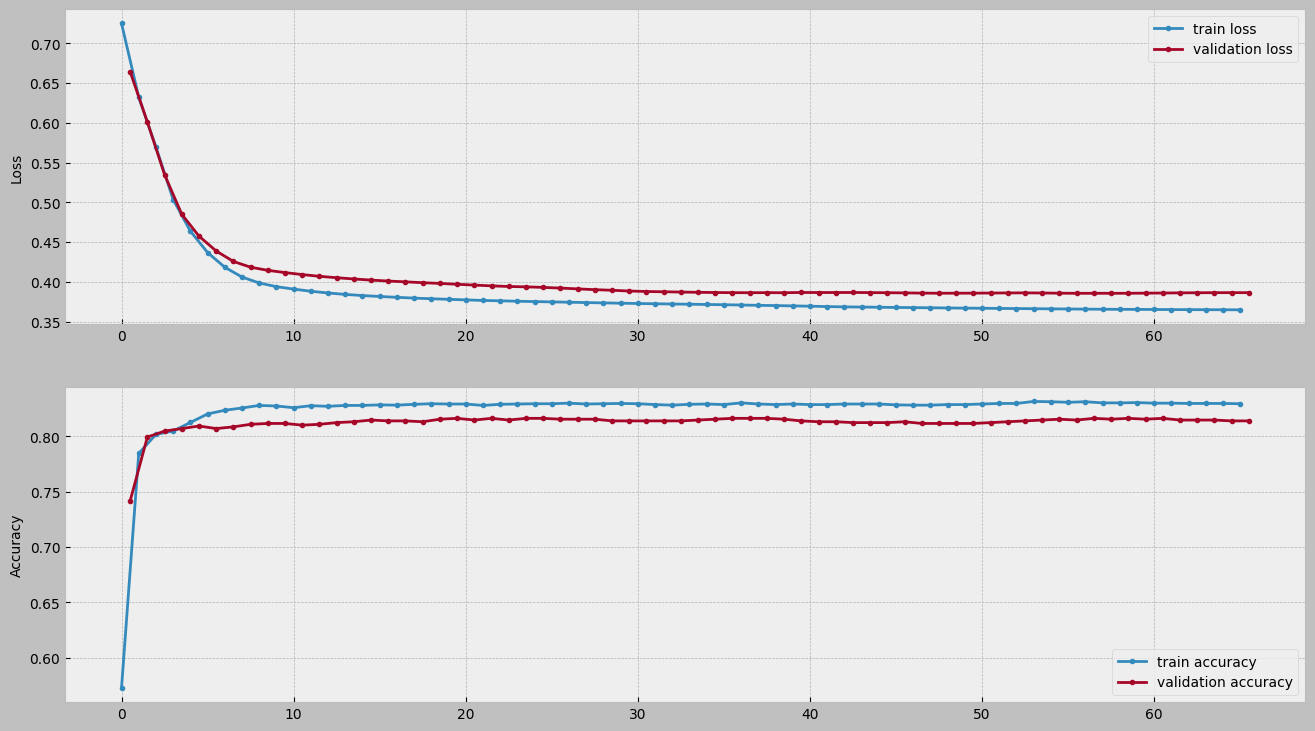

In [54]:
fig, (ax0, ax1) = plt.subplots(nrows=2)

ax0.plot(history.history['loss'], label='train loss', marker='.')
ax0.plot(np.array(history.epoch) + .5, 
         history.history['val_loss'], label='validation loss', marker='.')
ax0.set_ylabel('Loss')
ax0.legend();

ax1.plot(history.history['acc'], label='train accuracy', marker='.')
ax1.plot(np.array(history.epoch) + .5, 
         history.history['val_acc'], label='validation accuracy', marker='.')
ax1.set_ylabel('Accuracy')
ax1.legend();

In [55]:
neural_net.evaluate(X_tst, y_tst, verbose=False)

[0.4010731875896454, 0.823846161365509]

In [56]:
y_hat = neural_net.predict(X_tst, verbose=False).ravel()

print(classification_report(y_tst, y_hat > .5, target_names=['bad', 'good']))

              precision    recall  f1-score   support

         bad       0.85      0.94      0.90      1044
        good       0.59      0.34      0.43       256

    accuracy                           0.82      1300
   macro avg       0.72      0.64      0.67      1300
weighted avg       0.80      0.82      0.80      1300



C:\Users\tstefan\AppData\Local\Temp\ipykernel_21956\3871357334.py:3: RuntimeWarning: divide by zero encountered in divide
  f1 = 2 / (1 / prec + 1 / rec)


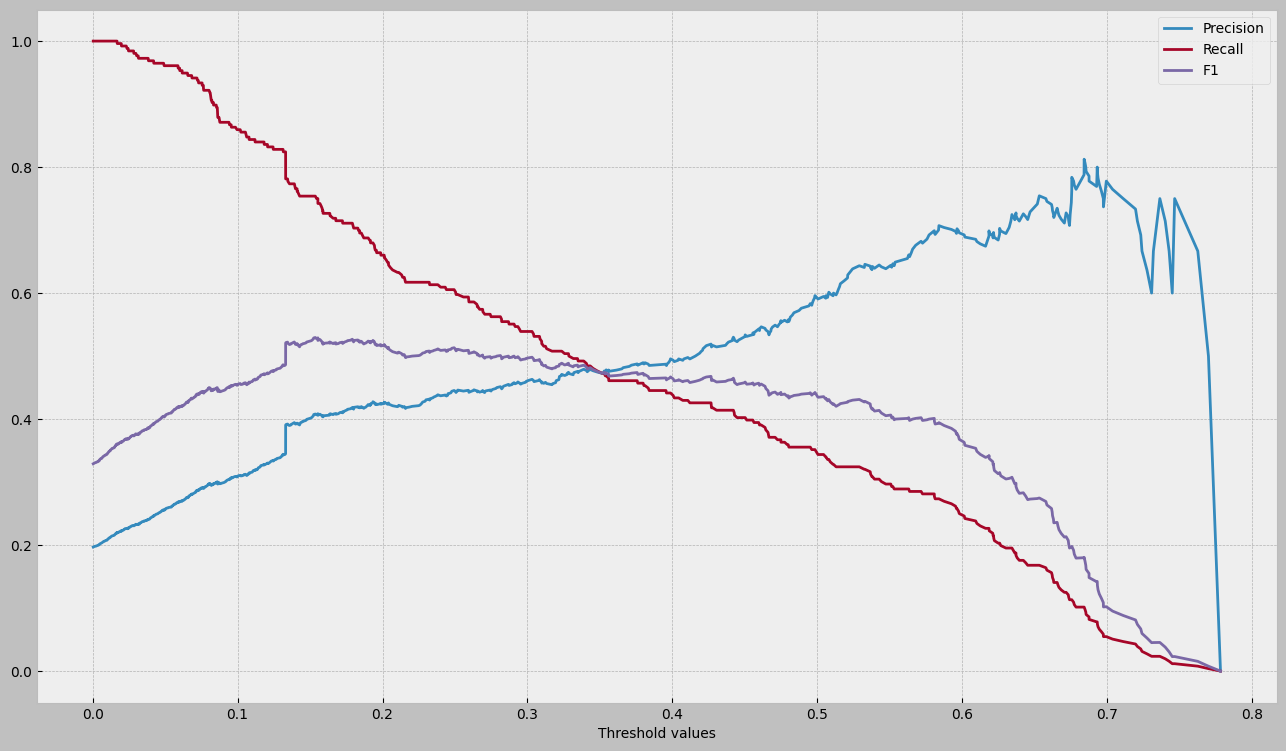

In [57]:
prec, rec, t = precision_recall_curve(y_tst, y_hat)

f1 = 2 / (1 / prec + 1 / rec)

plt.plot(t, prec[:-1], label='Precision')
plt.plot(t, rec[:-1], label='Recall')
plt.plot(t, f1[:-1], label='F1')
plt.xlabel('Threshold values')
plt.legend();

In [58]:
i = f1.argmax()
prec[i], rec[i], t[i]

(0.4080338266384778, 0.75390625, 0.15361588)

# So only classification?

| Type of problem | Final activation function | Loss function | Useful metrics |
|:---|:---|:---|:---|
| Binary classification | sigmoid | binary_crossentropy | (binary_)accuracy, f1 score |
| Categorical classification | softmax | categorical_crossentropy | (categorical_)accuracy, f1 score|
| Multi-label classification | sigmoid | binary_crossentropy | binary_accuracy |
| (Multi-)Regression | linear, relu, ... | mse / mean_squared_error | R<sup>2</sup> (custom implementation) |

[Scikit-learn's metrics documentation](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics)

[TF.Keras losses documentation](https://www.tensorflow.org/api_docs/python/tf/keras/losses)

[TF.Keras metrics documentation](https://www.tensorflow.org/api_docs/python/tf/keras/metrics)